In [1]:
from pynq import Overlay
from pynq.lib.pmod import Pmod_ADC
import time

# Load the bitstream (Make sure the bitstream contains the required SPI IP)
overlay = Overlay("ad1.bit")


In [2]:
adc_ip = overlay.PmodAD1_0



In [3]:
help(adc_ip )

Help on DefaultIP in module pynq.overlay object:

class DefaultIP(builtins.object)
 |  Driver for an IP without a more specific driver
 |  
 |  This driver wraps an MMIO device and provides a base class
 |  for more specific drivers written later. It also provides
 |  access to GPIO outputs and interrupts inputs via attributes. More specific
 |  drivers should inherit from `DefaultIP` and include a
 |  `bindto` entry containing all of the IP that the driver
 |  should bind to. Subclasses meeting these requirements will
 |  automatically be registered.
 |  
 |  Attributes
 |  ----------
 |  mmio : pynq.MMIO
 |      Underlying MMIO driver for the device
 |  _interrupts : dict
 |      Subset of the PL.interrupt_pins related to this IP
 |  _gpio : dict
 |      Subset of the PL.gpio_dict related to this IP
 |  
 |  Methods defined here:
 |  
 |  __init__(self, description)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  call(self, *args, **kwargs)
 |  
 |  re

In [4]:
adc_ip = overlay.PmodAD1_0

# Function to read data from the ADC channels
def read_adc(channel):
    # Example register addresses (adjust these according to your design)
    register_address = 0x00 + (channel * 0x02)  # Ensure channel data is aligned to 4-byte boundary
    data = adc_ip.mmio.read(0)  # Read channel-specific data
    return data

# Function to read data from both channels of PMOD AD1
def read_pmod_adc():
    for _ in range(100):  # Take 10 readings as an example
        # Read from channel 0 and channel 1
        value_channel_0 = read_adc(0)  # Read from Channel 0
        
        # Print the values from both channels
        print(value_channel_0)
        
        # Sleep for 1 second between readings
        time.sleep(0.1)

# Call the function to start reading data from the ADC



271777795
271777792
270532608
270467072
270270464
270270464
270204928
270204928
270204928
270467072
270532608
270729216
270729216
270729216
270991360
271319040
271515648
271581184
271581184
271843328


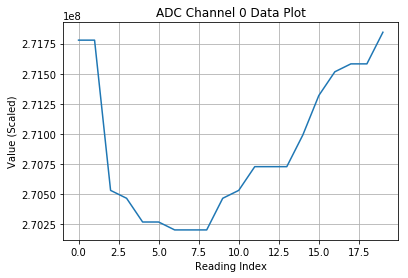

In [11]:
import time
import matplotlib.pyplot as plt

# Assuming adc_ip.mmio.read(0) returns a value for the given channel
def read_adc(channel):
    # Example register addresses (adjust these according to your design)
    register_address = 0x00 + (channel * 0x01)  # Ensure channel data is aligned to 4-byte boundary
    data = adc_ip.mmio.read(register_address)  # Read channel-specific data
    return data

# Function to read data from both channels of PMOD AD1 and plot it
def read_pmod_adc():
    values_channel_0 = []  # List to store Channel 0 readings

    for _ in range(20):  # Take 100 readings
        # Read from channel 0
        value_channel_0 = read_adc(0)  # Read from Channel 0
        value_channel_0_scaled = value_channel_0   # Scale the value for readability

        # Append the value to the list
        values_channel_0.append(value_channel_0_scaled)

        # Print the value from Channel 0
        print(value_channel_0_scaled)
        
        # Sleep for 0.1 seconds between readings
        time.sleep(0.1)

    # Plot the collected data
    plt.plot(values_channel_0)
    plt.title('ADC Channel 0 Data Plot')
    plt.xlabel('Reading Index')
    plt.ylabel('Value (Scaled)')
    plt.grid(True)
    plt.show()

# Call the function to start reading data and plot it
read_pmod_adc()
